# 기본설정

In [125]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 데이터전처리

In [126]:
import pandas as pd

inwon = pd.read_csv('C:/Users/user/Desktop/데이터/압축푼데이터/서울버스 일별 시간대별 승하차 인원.csv', encoding='euc-kr')
inwon2 = pd.read_csv('C:/Users/user/Desktop/데이터/압축푼데이터/서울철도 일별 시간대별 승하차 인원.csv', encoding='euc-kr')

In [127]:
inwon

,운행일자,노선ID,노선,정류장ID,정류장,승차시간구분,시간구분ID,승차총승객수,하차총승객수
0,2014-12-01,11110329,6411번(구로동~개포동),9009281,신트리아파트,19:00:00~19:59:59,30,6,4
1,2014-08-15,11110556,7730번(은평공영차고지~이북오도청),9001990,월곡동두산아파트,13:00:00~13:59:59,0,6,0
2,2015-06-05,11110677,2312번(중랑공영차고지~강동공영차고지),8501523,경문고등학교,19:00:00~19:59:59,30,1,14
3,2015-04-12,11110899,670번(온수동~디지털미디어시티역),9000198,성내주유소,23:00:00~23:59:59,0,19,1
4,2015-03-19,11110323,240번(중랑공영차고지~신사역사거리),9001139,중앙동성당앞,11:00:00~11:59:59,30,1,2
...,...,...,...,...,...,...,...,...,...
495,2015-10-08,11110359,1127번(도봉동~도봉동),14449,정부과천청사,13:00:00~13:59:59,30,0,1
496,2014-08-26,11110979,7720번(구산동~신촌),70063,세탁소,12:00:00~12:59:59,30,0,0
497,2014-11-04,11110415,7738번(은평공영차고지~홍제역),9000853,한전병원,06:00:00~06:59:59,0,12,0
498,2015-05-19,11110982,동작02(사자암~노량진역),9009299,새마을시장,12:00:00~12:59:59,0,9,0


In [128]:
def classify_season_from_date_tail(date):
    date_tail = date[-5:]  # '운행일자'의 뒤에서 5자리 추출
    if '01-01' <= date_tail <= '03-31':
        return "봄"
    elif '04-01' <= date_tail <= '06-30':  # 6월 31일이 아닌 6월 30일 수정
        return "여름"
    elif '07-01' <= date_tail <= '09-30':  # 9월 31일이 아닌 9월 30일 수정
        return "가을"
    elif '10-01' <= date_tail <= '12-31':
        return "겨울"
    else:
        return None  # 해당 범위가 아닌 경우 None 처리

# '운행일자' 컬럼을 문자열로 변환 후 계절을 적용
inwon['운행일자'] = pd.to_datetime(inwon['운행일자']).dt.strftime('%Y-%m-%d')
inwon['계절'] = inwon['운행일자'].apply(classify_season_from_date_tail)

inwon2['운행일자'] = pd.to_datetime(inwon2['운행일자']).dt.strftime('%Y-%m-%d')
inwon2['계절'] = inwon2['운행일자'].apply(classify_season_from_date_tail)

In [129]:
# 변환 함수 정의
def convert_time_code(time_str):
    # 문자열의 앞 두 자리를 정수로 변환
    return int(time_str[:2])

# 승차시간구분 컬럼 변환 적용
inwon['승차시간구분'] = inwon['승차시간구분'].apply(convert_time_code)

In [130]:
# 변환 함수 정의
def convert_time_code(time_str):
    # 문자열의 앞 두 자리를 정수로 변환
    return int(time_str[:2])

# 승차시간구분 컬럼 변환 적용
inwon2['승차시간구분'] = inwon2['승차시간구분'].apply(convert_time_code)

In [131]:
inwon3 = inwon[['승차시간구분','승차총승객수','하차총승객수','계절']]

In [132]:
inwon4 = inwon2[['승차시간구분','승차총승객수','하차총승객수','계절']]

In [133]:
combined_inwon = pd.concat([inwon3, inwon4], axis=0).reset_index(drop=True)

combined_inwon_1 = combined_inwon[combined_inwon['계절'] == '봄']
combined_inwon_2 = combined_inwon[combined_inwon['계절'] == '여름']
combined_inwon_3 = combined_inwon[combined_inwon['계절'] == '가을']
combined_inwon_4 = combined_inwon[combined_inwon['계절'] == '겨울']

In [134]:
grouped_data_1 = combined_inwon_1.groupby('승차시간구분')[['승차총승객수', '하차총승객수']].sum().reset_index()
grouped_data_2 = combined_inwon_2.groupby('승차시간구분')[['승차총승객수', '하차총승객수']].sum().reset_index()
grouped_data_3 = combined_inwon_3.groupby('승차시간구분')[['승차총승객수', '하차총승객수']].sum().reset_index()
grouped_data_4 = combined_inwon_4.groupby('승차시간구분')[['승차총승객수', '하차총승객수']].sum().reset_index()

In [135]:
nalssi = pd.read_csv('C:/Users/user/Desktop/데이터/압축푼데이터/OBS_ASOS_TIM_20250104050402.csv', encoding='euc-kr')

In [136]:
nalssi

,지점,지점명,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),적설(cm)
0,108,서울,2013-01-01 01:00,-8.5,NaN,4.0,57.0,6.4
1,108,서울,2013-01-01 02:00,-8.4,NaN,4.0,60.0,6.4
2,108,서울,2013-01-01 03:00,-8.1,NaN,3.4,58.0,6.4
3,108,서울,2013-01-01 04:00,-8.2,NaN,3.8,58.0,6.4
4,108,서울,2013-01-01 05:00,-8.2,NaN,4.4,61.0,6.4
...,...,...,...,...,...,...,...,...
8731,108,서울,2013-12-30 20:00,3.4,NaN,3.1,52.0,NaN
8732,108,서울,2013-12-30 21:00,3.0,NaN,2.6,54.0,NaN
8733,108,서울,2013-12-30 22:00,2.5,NaN,1.8,56.0,NaN
8734,108,서울,2013-12-30 23:00,2.1,NaN,1.9,57.0,NaN


In [137]:
# 'nalssi'의 6~7자리를 사용하여 계절을 구분하는 함수 정의
def classify_season_from_nalssi(date):
    month = date[5:7]  # 6~7번째 문자 추출 (월)
    if month in ['01', '02', '03']:
        return "봄"
    elif month in ['04', '05', '06']:
        return "여름"
    elif month in ['07', '08', '09']:
        return "가을"
    elif month in ['10', '11', '12']:
        return "겨울"
    else:
        return None

# 'nalssi' 데이터프레임의 '일시' 컬럼에서 계절 컬럼 생성
nalssi['계절'] = nalssi['일시'].astype(str).apply(classify_season_from_nalssi)

# 결과 확인
nalssi

,지점,지점명,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),적설(cm),계절
0,108,서울,2013-01-01 01:00,-8.5,NaN,4.0,57.0,6.4,봄
1,108,서울,2013-01-01 02:00,-8.4,NaN,4.0,60.0,6.4,봄
2,108,서울,2013-01-01 03:00,-8.1,NaN,3.4,58.0,6.4,봄
3,108,서울,2013-01-01 04:00,-8.2,NaN,3.8,58.0,6.4,봄
4,108,서울,2013-01-01 05:00,-8.2,NaN,4.4,61.0,6.4,봄
...,...,...,...,...,...,...,...,...,...
8731,108,서울,2013-12-30 20:00,3.4,NaN,3.1,52.0,NaN,겨울
8732,108,서울,2013-12-30 21:00,3.0,NaN,2.6,54.0,NaN,겨울
8733,108,서울,2013-12-30 22:00,2.5,NaN,1.8,56.0,NaN,겨울
8734,108,서울,2013-12-30 23:00,2.1,NaN,1.9,57.0,NaN,겨울


In [138]:
# 변환 함수 정의
def convert_time_code(time_str):
    # 문자열의 앞 두 자리를 정수로 변환
    return int(time_str[-5:-3])

# 승차시간구분 컬럼 변환 적용
nalssi['일시'] = nalssi['일시'].apply(convert_time_code)

In [139]:
nalssi_1 = nalssi[nalssi['계절'] == '봄']
nalssi_2 = nalssi[nalssi['계절'] == '여름']
nalssi_3 = nalssi[nalssi['계절'] == '가을']
nalssi_4 = nalssi[nalssi['계절'] == '겨울']

In [140]:
grouped_nalssi_1 = nalssi_1.groupby('일시')[['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '적설(cm)']].mean().reset_index()
grouped_nalssi_2 = nalssi_2.groupby('일시')[['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '적설(cm)']].mean().reset_index()
grouped_nalssi_3 = nalssi_3.groupby('일시')[['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '적설(cm)']].mean().reset_index()
grouped_nalssi_4 = nalssi_4.groupby('일시')[['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '적설(cm)']].mean().reset_index()

In [141]:
merged_data_1 = pd.merge(grouped_data_1, grouped_nalssi_1, left_on='승차시간구분', right_on='일시', how='inner')
merged_data_2 = pd.merge(grouped_data_2, grouped_nalssi_2, left_on='승차시간구분', right_on='일시', how='inner')
merged_data_3 = pd.merge(grouped_data_3, grouped_nalssi_3, left_on='승차시간구분', right_on='일시', how='inner')
merged_data_4 = pd.merge(grouped_data_4, grouped_nalssi_4, left_on='승차시간구분', right_on='일시', how='inner')

In [142]:
merged_data_1['승하차총승객수'] = merged_data_1['승차총승객수'] + merged_data_1['하차총승객수']
merged_data_1 = merged_data_1[['승차시간구분','승하차총승객수','기온(°C)','강수량(mm)','풍속(m/s)','습도(%)','적설(cm)']]

merged_data_2['승하차총승객수'] = merged_data_2['승차총승객수'] + merged_data_2['하차총승객수']
merged_data_2 = merged_data_2[['승차시간구분','승하차총승객수','기온(°C)','강수량(mm)','풍속(m/s)','습도(%)','적설(cm)']]

merged_data_3['승하차총승객수'] = merged_data_3['승차총승객수'] + merged_data_3['하차총승객수']
merged_data_3 = merged_data_3[['승차시간구분','승하차총승객수','기온(°C)','강수량(mm)','풍속(m/s)','습도(%)','적설(cm)']]

merged_data_4['승하차총승객수'] = merged_data_4['승차총승객수'] + merged_data_4['하차총승객수']
merged_data_4 = merged_data_4[['승차시간구분','승하차총승객수','기온(°C)','강수량(mm)','풍속(m/s)','습도(%)','적설(cm)']]


In [143]:
result_data1 = merged_data_1[['승차시간구분', '승하차총승객수', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '적설(cm)']]
result_data2 = merged_data_2[['승차시간구분', '승하차총승객수', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '적설(cm)']]
result_data3 = merged_data_3[['승차시간구분', '승하차총승객수', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '적설(cm)']]
result_data4 = merged_data_4[['승차시간구분', '승하차총승객수', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '적설(cm)']]

In [144]:
result_data1.to_csv('C:/Users/user/Desktop/데이터/결과데이터/result_봄.csv',index=False,encoding='utf-8-sig')
result_data2.to_csv('C:/Users/user/Desktop/데이터/결과데이터/result_여름.csv',index=False,encoding='utf-8-sig')
result_data3.to_csv('C:/Users/user/Desktop/데이터/결과데이터/result_가을.csv',index=False,encoding='utf-8-sig')
result_data4.to_csv('C:/Users/user/Desktop/데이터/결과데이터/result_겨울.csv',index=False,encoding='utf-8-sig')

# 출퇴근 시간 vs. 비출퇴근 시간의 기상 데이터가 차이나는 지 확인(T-검정)

In [145]:
from scipy.stats import ttest_ind

# result_data1, result_data2, result_data3, result_data4를 포함한다고 가정하고 t-검정을 수행
dataframes = [result_data1, result_data2, result_data3, result_data4]

# 결과를 저장할 리스트
all_weather_ttest_results = []

# 각 데이터프레임에 대해 t-검정 수행
for i, df in enumerate(dataframes, start=1):
    # 출퇴근 시간 구분
    df['출퇴근구분'] = df['승차시간구분'].apply(
        lambda x: '출퇴근시간' if (6 <= x <= 9 or 18 <= x <= 21) else '비출퇴근시간'
    )
    
    # 각 기상 변수에 대해 출퇴근과 비출퇴근 시간 비교 및 결과 저장
    for var in ['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '적설(cm)']:
        commute_weather = df[df['출퇴근구분'] == '출퇴근시간'][var]
        non_commute_weather = df[df['출퇴근구분'] == '비출퇴근시간'][var]
        t_stat, p_val = ttest_ind(commute_weather, non_commute_weather, equal_var=False)
        
        # 결과를 리스트에 추가
        all_weather_ttest_results.append({
            '계절': f'result_data{i}',
            '변수': var,
            'T-statistic': t_stat,
            'p-value': p_val
        })

# 데이터프레임으로 변환
all_weather_ttest_results_df = pd.DataFrame(all_weather_ttest_results)

# 계절명을 보기 쉽게 변환
all_weather_ttest_results_df['계절'] = all_weather_ttest_results_df['계절'].replace({
    'result_data1': '봄',
    'result_data2': '여름',
    'result_data3': '가을',
    'result_data4': '겨울'
})

# 결과를 정렬
all_weather_ttest_results_df.sort_values(by=['계절', '변수'], inplace=True)

all_weather_ttest_results_df

,계절,변수,T-statistic,p-value
11,가을,강수량(mm),0.444735,0.664265
10,가을,기온(°C),-1.301078,0.211158
13,가을,습도(%),1.298696,0.211384
14,가을,적설(cm),NaN,NaN
12,가을,풍속(m/s),-0.563825,0.580908
16,겨울,강수량(mm),NaN,NaN
15,겨울,기온(°C),-1.937137,0.068612
18,겨울,습도(%),1.867705,0.076855
19,겨울,적설(cm),0.349888,0.732414
17,겨울,풍속(m/s),-1.290070,0.211970


* 봄,여름,가을,겨울 모두 기온, 강수량, 풍속, 습도, 적설 모두 p-value > 0.05이므로, 출퇴근 시간과 비출퇴근 시간 간에 통계적으로 유의미한 차이가 없었다.

# 상관분석으로 인사이트 도출하기

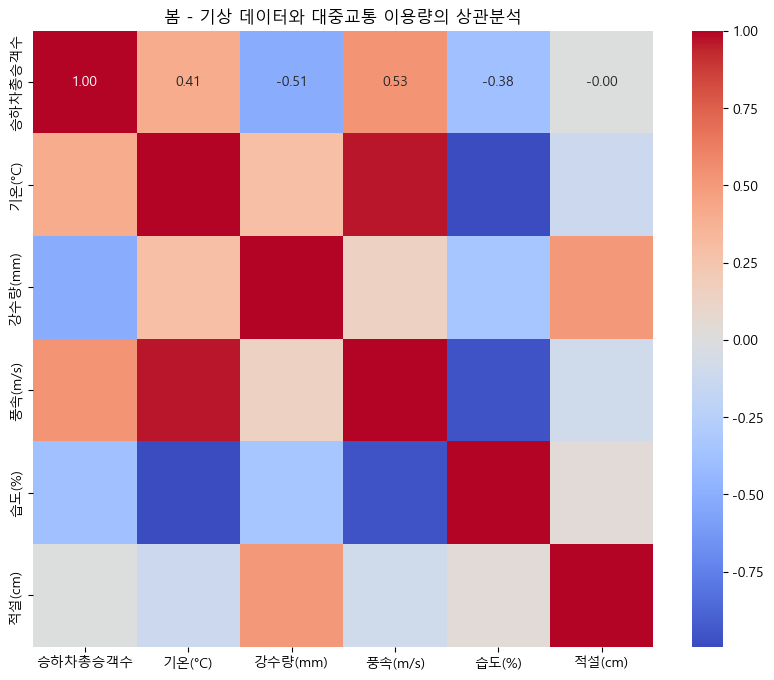

c:\Users\USER\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


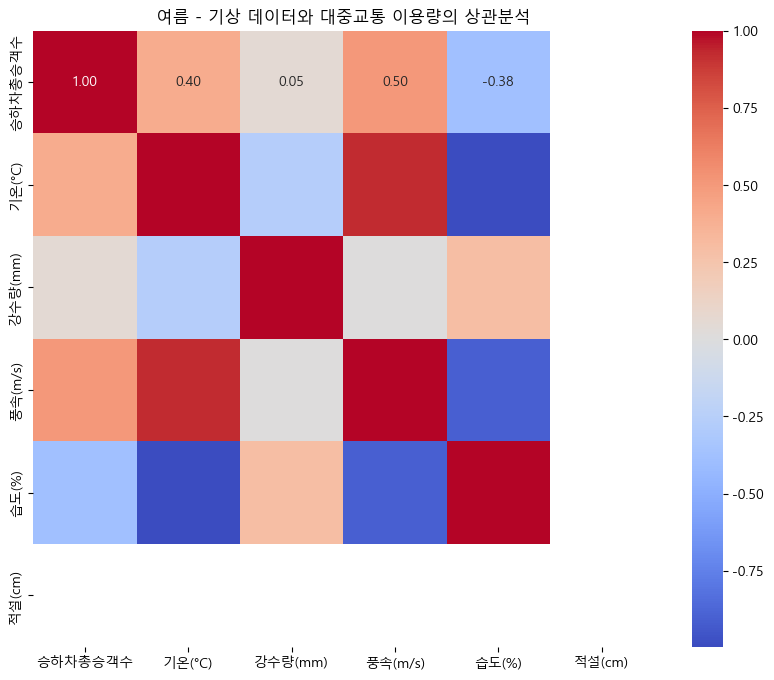

c:\Users\USER\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


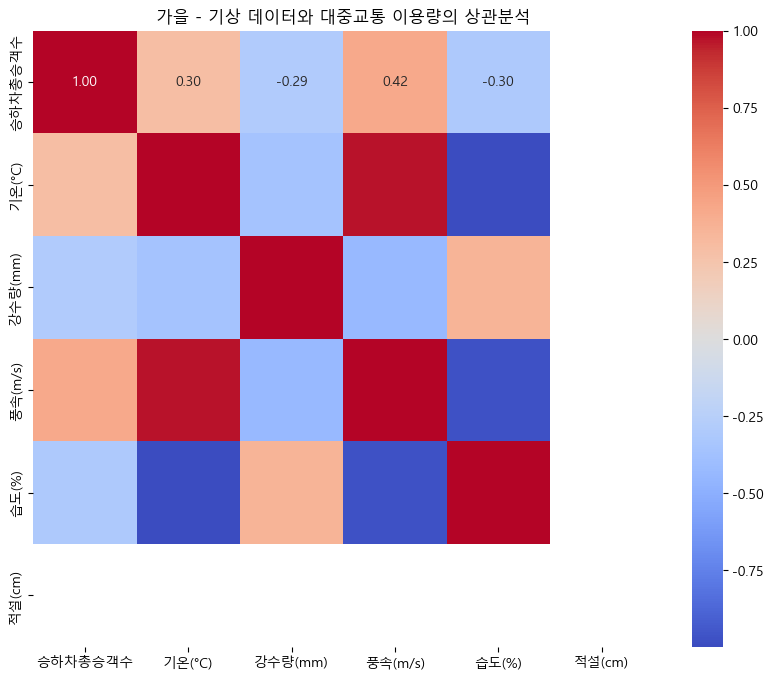

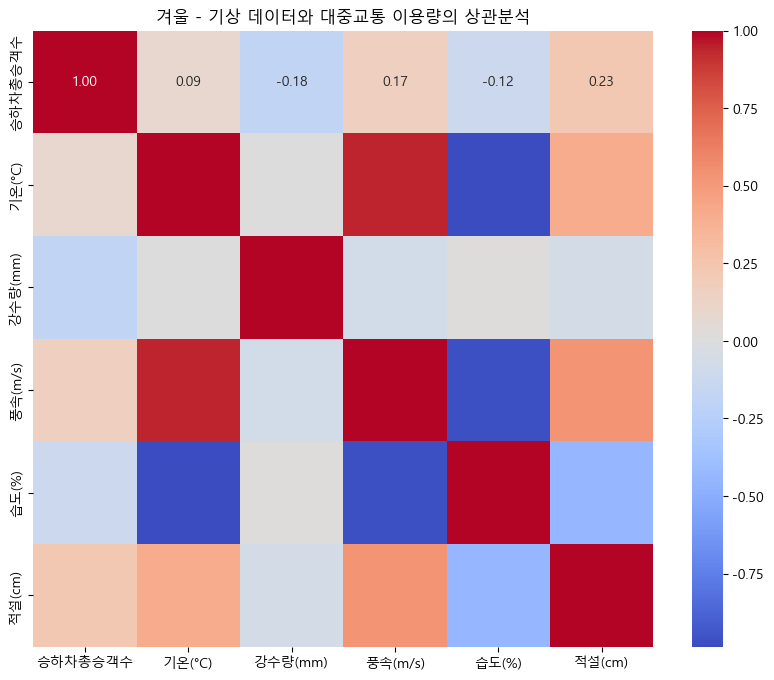

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

# 대중교통 이용량 (승하차총승객수)와 기상 데이터만 선택
weather_columns = ['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '적설(cm)']

# result_data1, result_data2, result_data3, result_data4를 포함한다고 가정하고 상관계수 히트맵을 생성
dataframes = [result_data1, result_data2, result_data3, result_data4]
season_names = ['봄', '여름', '가을', '겨울']

# 각 데이터프레임에 대해 상관계수 히트맵 생성
for i, df in enumerate(dataframes):
    plt.figure(figsize=(10, 8))
    df_weather = df[['승하차총승객수'] + weather_columns]
    correlation_matrix = df_weather.corr()
    
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"{season_names[i]} - 기상 데이터와 대중교통 이용량의 상관분석")
    plt.show()



# 계절별 상관분석 인사이트

## 봄
- **기온(°C)**: 기온이 높을수록 대중교통 이용량이 증가하는 경향을 보임. (상관계수: 0.405)
- **강수량(mm)**: 강수량이 많을수록 대중교통 이용량이 감소하는 경향을 보임. (상관계수: -0.514)
- **풍속(m/s)**: 바람이 많이 불수록 대중교통 이용량이 증가하는 경향을 보임. (상관계수: 0.528)
- **습도(%)**: 습도가 높을수록 대중교통 이용량이 감소하는 경향을 보임. (상관계수: -0.380)
- **적설(cm)**: 적설량이 많을수록 대중교통 이용량이 거의 영향을 주지 않음. (상관계수: -0.003)

---

## 여름
- **기온(°C)**: 기온이 높을수록 대중교통 이용량이 증가하는 경향을 보임. (상관계수: 0.401)
- **강수량(mm)**: 강수량과 대중교통 이용량 간 상관관계가 크지 않음. (상관계수: 0.055)
- **풍속(m/s)**: 바람이 많이 불수록 대중교통 이용량이 증가하는 경향을 보임. (상관계수: 0.502)
- **습도(%)**: 습도가 높을수록 대중교통 이용량이 감소하는 경향을 보임. (상관계수: -0.384)
- **적설(cm)**: 여름철 적설량 데이터가 없거나 거의 없으므로 영향 없음.

---

## 가을
- **기온(°C)**: 기온이 높을수록 대중교통 이용량이 증가하는 경향을 보임. (상관계수: 0.297)
- **강수량(mm)**: 강수량이 많을수록 대중교통 이용량이 감소하는 경향을 보임. (상관계수: -0.289)
- **풍속(m/s)**: 바람이 많이 불수록 대중교통 이용량이 증가하는 경향을 보임. (상관계수: 0.417)
- **습도(%)**: 습도가 높을수록 대중교통 이용량이 감소하는 경향을 보임. (상관계수: -0.305)
- **적설(cm)**: 가을철 적설량 데이터가 없거나 거의 없으므로 영향 없음.

---

## 겨울
- **기온(°C)**: 기온이 낮을수록 대중교통 이용량이 감소하는 경향을 보임. (상관계수: 0.087)
- **강수량(mm)**: 강수량이 많을수록 대중교통 이용량이 감소하는 경향을 보임. (상관계수: -0.182)
- **풍속(m/s)**: 바람이 많이 불수록 대중교통 이용량이 증가하는 경향을 보임. (상관계수: 0.168)
- **습도(%)**: 습도가 높을수록 대중교통 이용량이 감소하는 경향을 보임. (상관계수: -0.120)
- **적설(cm)**: 적설량이 많을수록 대중교통 이용량이 증가하는 경향을 보임. (상관계수: 0.231)



# p-value를 활용한 검증[피어슨 상관계수(연속형 변수)]

In [148]:
from scipy.stats import pearsonr

# 각 계절별 피어슨 상관계수 및 p-value 계산 (result_data1, result_data2, result_data3, result_data4 기준)
dataframes = [result_data1, result_data2, result_data3, result_data4]
season_names = ['봄', '여름', '가을', '겨울']

# 피어슨 상관계수 및 p-value 결과 저장
pvalue_results = {}

# 각 계절별로 계산
for i, df in enumerate(dataframes):
    season_results = {}
    for var in ['기온(°C)', '강수량(mm)', '습도(%)', '풍속(m/s)', '적설(cm)']:
        # 결측치 제거 및 데이터 수 확인
        clean_data = df[[var, '승하차총승객수']].dropna()
        if len(clean_data) >= 2:
            corr, pval = pearsonr(clean_data[var], clean_data['승하차총승객수'])
            season_results[var] = {'Correlation': corr, 'p-value': pval}
        else:
            season_results[var] = {'Correlation': None, 'p-value': None}
    
    # 각 계절의 결과를 저장
    pvalue_results[season_names[i]] = pd.DataFrame(season_results).T



In [149]:
pvalue_results

{'봄':          Correlation   p-value
 기온(°C)      0.405530  0.061144
 강수량(mm)    -0.514492  0.192043
 습도(%)      -0.379797  0.081258
 풍속(m/s)     0.528119  0.011523
 적설(cm)     -0.003464  0.987795,
 '여름':         Correlation   p-value
 기온(°C)     0.400904  0.064446
 강수량(mm)    0.054708  0.808932
 습도(%)     -0.384495   0.07726
 풍속(m/s)    0.502331  0.017198
 적설(cm)         None      None,
 '가을':         Correlation   p-value
 기온(°C)     0.297396  0.178905
 강수량(mm)   -0.289279  0.191633
 습도(%)     -0.304812  0.167795
 풍속(m/s)    0.416774  0.053658
 적설(cm)         None      None,
 '겨울':          Correlation   p-value
 기온(°C)      0.087245  0.699448
 강수량(mm)    -0.181642  0.443419
 습도(%)      -0.119509  0.596299
 풍속(m/s)     0.167665  0.455779
 적설(cm)      0.230938  0.301122}

# 계절별 피어슨 상관분석 인사이트

---

## 🌸 봄
- **기온(°C)**: `상관계수 = 0.405`, `p-value = 0.061` → p-value > 0.05, 유의미하지 않음.
- **강수량(mm)**: `상관계수 = -0.514`, `p-value = 0.192` → p-value > 0.05, 유의미하지 않음.
- **습도(%)**: `상관계수 = -0.380`, `p-value = 0.081` → p-value > 0.05, 유의미하지 않음.
- **풍속(m/s)**: `상관계수 = 0.528`, `p-value = 0.012` → **p-value < 0.05, 유의미함.**
- **적설(cm)**: `상관계수 = -0.003`, `p-value = 0.988` → p-value > 0.05, 유의미하지 않음.

**결론:**  
- 봄에는 **풍속**이 대중교통 이용량과 유의미한 양의 상관관계를 보임.
- 나머지 변수들은 p-value > 0.05로 유의미하지 않음.

---

## ☀️ 여름
- **기온(°C)**: `상관계수 = 0.401`, `p-value = 0.064` → p-value > 0.05, 유의미하지 않음.
- **강수량(mm)**: `상관계수 = 0.055`, `p-value = 0.809` → p-value > 0.05, 유의미하지 않음.
- **습도(%)**: `상관계수 = -0.384`, `p-value = 0.077` → p-value > 0.05, 유의미하지 않음.
- **풍속(m/s)**: `상관계수 = 0.502`, `p-value = 0.017` → **p-value < 0.05, 유의미함.**
- **적설(cm)**: 데이터 없음.

**결론:**  
- 여름에도 **풍속**이 대중교통 이용량과 유의미한 양의 상관관계를 보임.
- 나머지 변수들은 유의미하지 않음.

---

## 🍂 가을
- **기온(°C)**: `상관계수 = 0.297`, `p-value = 0.179` → p-value > 0.05, 유의미하지 않음.
- **강수량(mm)**: `상관계수 = -0.289`, `p-value = 0.192` → p-value > 0.05, 유의미하지 않음.
- **습도(%)**: `상관계수 = -0.305`, `p-value = 0.168` → p-value > 0.05, 유의미하지 않음.
- **풍속(m/s)**: `상관계수 = 0.417`, `p-value = 0.054` → p-value > 0.05, 유의미하지 않음.
- **적설(cm)**: 데이터 없음.

**결론:**  
- 가을에는 **모든 변수들이 유의미하지 않은 결과**를 보임.

---

## ❄️ 겨울
- **기온(°C)**: `상관계수 = 0.087`, `p-value = 0.699` → p-value > 0.05, 유의미하지 않음.
- **강수량(mm)**: `상관계수 = -0.182`, `p-value = 0.443` → p-value > 0.05, 유의미하지 않음.
- **습도(%)**: `상관계수 = -0.120`, `p-value = 0.596` → p-value > 0.05, 유의미하지 않음.
- **풍속(m/s)**: `상관계수 = 0.168`, `p-value = 0.456` → p-value > 0.05, 유의미하지 않음.
- **적설(cm)**: `상관계수 = 0.231`, `p-value = 0.301` → p-value > 0.05, 유의미하지 않음.

**결론:**  
- 겨울에는 **모든 변수들이 유의미하지 않은 결과**를 보임.

---

## 📊 종합 결론:
- **풍속(m/s)**만 봄과 여름에 대중교통 이용량과 유의미한 **양의 상관관계**를 보임.
- **기온, 강수량, 습도, 적설**은 모든 계절에서 p-value > 0.05로 **유의미하지 않음**.
- 여름과 봄에 **풍속이 강할수록** 대중교통 이용량이 증가하는 경향을 보임.


# 단순회귀분석을 활용한 정확한 수치 표출

In [150]:
# 단순회귀를 위한 회귀 분석 (각 변수에 대해 개별적으로)
from sklearn.linear_model import LinearRegression

# 결과를 저장할 데이터프레임 생성
simple_regression_results = {}

dataframes = [result_data1, result_data2]
season_names = ['봄', '여름']

for i, df in enumerate(dataframes):
    var = '풍속(m/s)'
    X_single = df[[var]].dropna()
    y_single = df.loc[X_single.index, '승하차총승객수']
    
    # 단순회귀 모델 생성 및 학습
    model_single = LinearRegression()
    model_single.fit(X_single, y_single)
    
    # 회귀계수와 절편 저장
    simple_regression_results[season_names[i]] = {
        'Coefficient': model_single.coef_[0],
        'Intercept': model_single.intercept_
    }

# 결과를 데이터프레임으로 정리
simple_regression_results_df = pd.DataFrame(simple_regression_results).T

simple_regression_results_df


,Coefficient,Intercept
봄,3164.464374,-4653.584425
여름,2694.289314,-2254.525480


# 최종결론 (봄, 여름 - 풍속 기준)

## 🌸 봄
- **풍속이 1m/s 증가할 때**, 대중교통 이용량은 약 **3,164.46명 증가**한다.

## ☀️ 여름
- **풍속이 1m/s 증가할 때**, 대중교통 이용량은 약 **2,694.29명 증가**한다.

---

## 📊 종합 결론:
- **봄과 여름** 모두 **풍속이 증가할수록** 대중교통 이용량이 증가하는 경향이 확인됨.
- **기온, 습도, 강수량, 적설량**의 경우 이번 분석에서는 포함되지 않았음.
